IA & Data science (LU3IN0226) -- 2020-2021
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Edoardo Sarti, Olivier Schwander.*


## Projet 2021

### Préparation du notebook


<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

KRISNI Almehdi - 3800519
<br/>BADRIOUICHE Mohamed - 3701404

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2021</tt> et rajouter à la suite de <tt>projet-2021</tt> les noms des membres du binômes séparés par un tiret.

Par exemple, pour le binôme Luke Skywalker et Han Solo, le nom de fichier devient `projet2021-Skywalker-Solo`

Penser à sauvegarder fréquemment le fichier en cours de travail :
- soit en cliquant sur l'icône "disquette"
- soit par la combinaison de touches [Ctrl]-S

## Données

Les données vous sont fournies sur le moodle. 
Ces données sont fournies sur Kaggle, ce sont les données *Google Play Store Apps* accessibles à l'adresse https://www.kaggle.com/lava18/google-play-store-apps.

Il est indispensable de lire en détail la page Kaggle pour comprendre à quoi ces données correspondent.

Le compte-rendu a fournir le jour de la dernière séance de TDTME de votre groupe doit comporter:
- un fichier PDF qui correspond à un poster sur lequel sont expliqués les différents problèmes traités, la façon dont ils ont été traités, et les résultats obtenus.
- un notebook par problème traité, vous pouvez traiter autant de problème que vous le souhaitez. Le problème étudié doit être décrit précisément et vous devez impérativement suivre le format ci-dessous.

Bien entendu, le tout sera mis dans un fichier archive (tar.gz ou zip exclusivement) et déposé sur le site Moodle.


## Imports

Dans cette partie du notebook, on effectue tout les import de modules allant etre utilisés dans le projet.

In [1]:
# Importation des librairies standards :
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

# Importation de votre librairie iads :
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../') # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

## Partie 0 - Chargement et nettoyage des données

## Données Google Play Store

Dans les données à analyser, il existe des exemples ne pouvant pas etre utilisés puisque certains champs de ces exemples sont inutilisables. 
Par exemple, il peut s'agir de champs Nan ou de valeurs anormales (dans le champ Size de certains exemples, on a parfois la valeur 'Varies with device'). 
Il faut donc retirer ces exemples de la base de données en priorité.

On récupère les données :

In [2]:
gpsdf = pd.read_csv("data/GoogleApps/googleplaystore.csv")
gpsdf[0:5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Le nombre d'exemples dans la base de données est de :

In [3]:
print(gpsdf.shape[0], "exemples")

10841 exemples


Les différents champs des exemples de cette base de données sont :

In [4]:
for i in gpsdf.columns :
    print(i)
print("(" + str(len(gpsdf.columns)) + " champs différents)")

App
Category
Rating
Reviews
Size
Installs
Type
Price
Content Rating
Genres
Last Updated
Current Ver
Android Ver
(13 champs différents)


On affiche les informations relatives à chacun des champs de la base de données :

In [5]:
gpsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


On remarque que les champs Rating, Type, Content Rating, Current Ver ou Android Ver de certains exemples sont nuls. Il faut donc retirer ces exemples en priorité.

On s'occupe dans un premier temps de retirer toutes les exemples possedant des champs avec des valeurs Nan.

In [6]:
gpsdf = gpsdf.dropna()
gpsdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


Le nombre d'exemples dans la base de données est maintenant de 9360 exemples.

La fonction suivante permet de retirer le prefixe, le suffixe et d'autres éléments inutiles dans les champs des exemples de la base de données.

In [7]:
def clean_elements(column) :
    """ La fonction prend en argument une colonne de la base de données et la renvoie nettoyée
    """
    
    column = column.str.replace('+', '') # Suppression des symboles +
    column = column.str.replace(',', '') # Suppression des symboles ,
    column = column.str.replace('$', '') # Suppression des symboles $
    column = column.str.replace("'", '') # Suppression des symboles '
    
    return column

### Nettoyage de la colonne Category

On affiche les valeurs unique de la colonne Category.

In [8]:
gpsdf.loc[:,'Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Afin que ces valeurs soient utilisables lors de l'apprentissage, on décide de diviser la colonne 'Category' en plusieurs colonnes différents. 
<br/>Chaque colonne permettra de savoir à quelle catégorie de 'Category' cette application appartient. 
<br/>(Par exemple, si une application a la valeur 1 dans son champ 'Category_GAME', cela signifie que l'application est destinée fait partie de la catégorie 'GAME').

In [9]:
gpsdf = pd.concat([gpsdf, pd.get_dummies(gpsdf['Category'], prefix='C')], axis=1)
gpsdf.drop(['Category'], axis=1, inplace=True)

On affiche l'état de la base de données après avoir réalisé la modification.

In [10]:
gpsdf.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,C_PERSONALIZATION,C_PHOTOGRAPHY,C_PRODUCTIVITY,C_SHOPPING,C_SOCIAL,C_SPORTS,C_TOOLS,C_TRAVEL_AND_LOCAL,C_VIDEO_PLAYERS,C_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",...,0,0,0,0,0,0,0,0,0,0


### Nettoyage de la colonne Rating

On affiche les valeurs uniques de la colonne Rating. Il s'agit de flottants donc ces valeurs peut etre directement utilisées.

In [11]:
gpsdf.loc[:,'Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

### Nettoyage de la colonne Reviews

On affiche les valeurs uniques de la colonne Reviews.

In [12]:
gpsdf.loc[:,'Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

On souhaite également transformer les valeurs de Reviews en entier afin de faciliter leurs utilisations lors de l'apprentissage (elles sont pour l'instant au format String).
<br/>On utilise pour cela la fonction to_numeric de la bibliothèque pandas.

In [13]:
gpsdf['Reviews'] = pd.to_numeric(gpsdf['Reviews'])
gpsdf.loc[:,'Reviews'].unique()

array([   159,    967,  87510, ...,    603,   1195, 398307])

### Nettoyage de la colonne Size

On affiche les valeurs uniques de la colonne Size.

In [14]:
gpsdf.loc[:,'Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

La valeur 'Varies with device' ne pouvant pas etre utilisée lors de l'apprentissage, on décide de supprime tout les exemples de la base de données dont la valeur du champ Size est 'Varies with device'.

In [15]:
gpsdf.drop(gpsdf[gpsdf['Size'] == "Varies with device"].index, inplace=True)

Le nombre d'exemples dans la base de données est désormais de :

In [16]:
print(gpsdf.shape[0], "exemples")

7723 exemples


On aimerait que ces valeurs soit des flottants et non pas des String. On suppose que les 'M' représente les mega-octets et 'k' les kilo-octets.
<br/>On effectue alors une modification générale sur tout les champs Size des exemples de la base de données. <br/>On décide de garder comme valeur la taille en mega-octets de l'application.

In [17]:
size_data = gpsdf['Size'].loc[gpsdf['Size'].str.contains('k')].index.tolist()
convert_data = pd.DataFrame(gpsdf.loc[size_data, 'Size'].apply(lambda x : x.strip('k')).astype(float).apply(lambda x : x/1024).apply(lambda x : round(x, 3)).astype(str))
gpsdf.loc[size_data, 'Size'] = convert_data

gpsdf['Size'] = gpsdf['Size'].apply(lambda x:x.strip('M'))
gpsdf['Size'] = gpsdf['Size'].astype(float)

On affiche les valeurs uniques de la colonne Size après modification.

In [18]:
gpsdf.loc[:,'Size'].unique()

array([1.90e+01, 1.40e+01, 8.70e+00, 2.50e+01, 2.80e+00, 5.60e+00,
       2.90e+01, 3.30e+01, 3.10e+00, 2.80e+01, 1.20e+01, 2.00e+01,
       2.10e+01, 3.70e+01, 5.50e+00, 1.70e+01, 3.90e+01, 3.10e+01,
       4.20e+00, 2.30e+01, 6.00e+00, 6.10e+00, 4.60e+00, 9.20e+00,
       5.20e+00, 1.10e+01, 2.40e+01, 9.40e+00, 1.50e+01, 1.00e+01,
       1.20e+00, 2.60e+01, 8.00e+00, 7.90e+00, 5.60e+01, 5.70e+01,
       3.50e+01, 5.40e+01, 1.96e-01, 3.60e+00, 5.70e+00, 8.60e+00,
       2.40e+00, 2.70e+01, 2.70e+00, 2.50e+00, 7.00e+00, 1.60e+01,
       3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+01, 3.20e+01,
       5.40e+00, 1.80e+01, 1.10e+00, 2.20e+00, 4.50e+00, 9.80e+00,
       5.20e+01, 9.00e+00, 6.70e+00, 3.00e+01, 2.60e+00, 7.10e+00,
       2.20e+01, 6.40e+00, 3.20e+00, 8.20e+00, 4.90e+00, 9.50e+00,
       5.00e+00, 5.90e+00, 1.30e+01, 7.30e+01, 6.80e+00, 3.50e+00,
       4.00e+00, 2.30e+00, 2.10e+00, 4.20e+01, 9.10e+00, 5.50e+01,
       2.20e-02, 7.30e+00, 6.50e+00, 1.50e+00, 7.50e+00, 5.10e

### Nettoyage de la colonne Installs

Dans la colonne Installs, les données sont représentées sous la forme "valeur"+ et la valeur est parfois séparée par des virgules. On préfère garder uniquement la valeur et retirer le symbole +. On fait donc appel à la fonction remove_elements sur la colonne.

Les éléments uniques de la colonne Installs avant l'utilisation de la fonction sont :

In [19]:
gpsdf.loc[:,'Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [20]:
gpsdf['Installs'] = clean_elements(gpsdf['Installs'])

<ipython-input-7-3b54758a420a>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  column = column.str.replace('+', '') # Suppression des symboles +
<ipython-input-7-3b54758a420a>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  column = column.str.replace('$', '') # Suppression des symboles $


Les éléments uniques de la colonne Installs après l'utilisation de la fonction sont :

In [21]:
gpsdf.loc[:,'Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000', '500000000',
       '100', '500', '10', '1000000000', '5', '50', '1'], dtype=object)

On souhaite également transformer les valeurs de Installs en entier afin de faciliter leurs utilisations lors de l'apprentissage (elles sont pour l'instant au format String).
<br/>On utilise pour cela la fonction to_numeric de la bibliothèque pandas.

In [22]:
gpsdf['Installs'] = pd.to_numeric(gpsdf['Installs'])
gpsdf.loc[:,'Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,        100,        500,         10,
       1000000000,          5,         50,          1])

### Nettoyage de la colonne Type

On affiche les valeurs uniques de la colonne Type.

In [23]:
gpsdf.loc[:,'Type'].unique()

array(['Free', 'Paid'], dtype=object)

Afin que ces données soient utilisables lors de l'apprentissage, on décide de représenter la valeur 'Free' par la valeur 0 et la valeur 'Paid' par la valeur 1.

In [24]:
gpsdf.loc[:,'Type'] = gpsdf.loc[:,'Type'].apply(lambda x : 0 if (x == 'Free') else 1)

On affiche les valeurs uniques de la colonne Type après modification.

In [25]:
gpsdf.loc[:,'Type'].unique()

array([0, 1])

### Nettoyage de la colonne Price

On affiche les valeurs uniques de la colonne Price.

In [26]:
gpsdf.loc[:,'Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

Afin que ces valeurs soient utilisables lors de l'apprentissage, on décide de retirer les symboles '$' et de les convertir en flottant.

In [27]:
gpsdf['Price'] = clean_elements(gpsdf['Price'])
gpsdf['Price'] = pd.to_numeric(gpsdf['Price'])

<ipython-input-7-3b54758a420a>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  column = column.str.replace('+', '') # Suppression des symboles +
<ipython-input-7-3b54758a420a>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  column = column.str.replace('$', '') # Suppression des symboles $


On affiche les valeurs uniques de la colonne Price après modification.

In [28]:
gpsdf.loc[:,'Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

### Nettoyage de la colonne Content Rating

On affiche les valeurs uniques de la colonne Content Rating.

In [29]:
gpsdf.loc[:,'Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Afin que ces valeurs soient utilisables lors de l'apprentissage, on décide de diviser la colonne 'Content Rating' en plusieurs colonnes différents. 
<br/>Chaque colonne permettra de savoir à quelle catégorie de 'Content Rating' cette application appartient.
<br/>(Par exemple, si une application a la valeur 1 dans son champ 'CR_Everyone', cela signifie que l'application est destinée à tout les public, soit 'Everyone').

In [30]:
gpsdf = pd.concat([gpsdf, pd.get_dummies(gpsdf['Content Rating'], prefix='CR')], axis=1)
gpsdf.drop(['Content Rating'], axis=1, inplace=True)

### Nettoyage des colonnes Application, Genres, Last Updated, Current Ver et Android Ver

Aucune modification ne sera effectuée au niveau de ces colonnes puisque leurs données ne seront pas utilisées lors de l'apprentissage.

On affiche l'état de la base de données après avoir réalisé la modification.



In [31]:
gpsdf.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,...,C_TOOLS,C_TRAVEL_AND_LOCAL,C_VIDEO_PLAYERS,C_WEATHER,CR_Adults only 18+,CR_Everyone,CR_Everyone 10+,CR_Mature 17+,CR_Teen,CR_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,19.0,10000,0,0.0,Art & Design,"January 7, 2018",1.0.0,...,0,0,0,0,0,1,0,0,0,0
1,Coloring book moana,3.9,967,14.0,500000,0,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,...,0,0,0,0,0,1,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,8.7,5000000,0,0.0,Art & Design,"August 1, 2018",1.2.4,...,0,0,0,0,0,1,0,0,0,0
3,Sketch - Draw & Paint,4.5,215644,25.0,50000000,0,0.0,Art & Design,"June 8, 2018",Varies with device,...,0,0,0,0,0,0,0,0,1,0
4,Pixel Draw - Number Art Coloring Book,4.3,967,2.8,100000,0,0.0,Art & Design;Creativity,"June 20, 2018",1.1,...,0,0,0,0,0,1,0,0,0,0


Les différentes colonnes de la base de données sont désormais :

In [32]:
for c in gpsdf.columns :
    print(c)
print("(" + str(gpsdf.shape[1]) + " champs différents)")

App
Rating
Reviews
Size
Installs
Type
Price
Genres
Last Updated
Current Ver
Android Ver
C_ART_AND_DESIGN
C_AUTO_AND_VEHICLES
C_BEAUTY
C_BOOKS_AND_REFERENCE
C_BUSINESS
C_COMICS
C_COMMUNICATION
C_DATING
C_EDUCATION
C_ENTERTAINMENT
C_EVENTS
C_FAMILY
C_FINANCE
C_FOOD_AND_DRINK
C_GAME
C_HEALTH_AND_FITNESS
C_HOUSE_AND_HOME
C_LIBRARIES_AND_DEMO
C_LIFESTYLE
C_MAPS_AND_NAVIGATION
C_MEDICAL
C_NEWS_AND_MAGAZINES
C_PARENTING
C_PERSONALIZATION
C_PHOTOGRAPHY
C_PRODUCTIVITY
C_SHOPPING
C_SOCIAL
C_SPORTS
C_TOOLS
C_TRAVEL_AND_LOCAL
C_VIDEO_PLAYERS
C_WEATHER
CR_Adults only 18+
CR_Everyone
CR_Everyone 10+
CR_Mature 17+
CR_Teen
CR_Unrated
(50 champs différents)


## Données Google Play Store Reviews

Comme pour la première base de données que nous allons utiliser, nous allons procéder au nettoyage de la deuxième afin que ces données soient utilisables lors de l'apprentissage.

On récupère la base de données :

In [33]:
gpsrevdf = pd.read_csv("data/GoogleApps/googleplaystore_user_reviews.csv")
gpsrevdf[0:5]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


Le nombre d'exemple dans la base de données est de :

In [34]:
print(str(gpsrevdf.shape[0]) + " exemples")

64295 exemples


Les différentes champs des exemples de la base de données sont :

In [35]:
for c in gpsrevdf.columns :
    print(c)
print("(" + str(gpsrevdf.shape[1]) + " champs différents)")

App
Translated_Review
Sentiment
Sentiment_Polarity
Sentiment_Subjectivity
(5 champs différents)


On affiche les informations de la base de données :

In [36]:
gpsrevdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


On remarque que les champs Translated_Review, Sentiment, Sentiment_Polarity ou Sentiment_Subjectivity de certains exemples sont nuls. Il faut donc retirer ces exemples en priorité.

On s'occupe dans un premier temps de retirer toutes les exemples possedant des champs avec des valeurs Nan.

In [37]:
gpsrevdf = gpsrevdf.dropna()
gpsrevdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


Le nombre d'exemples dans la base de données est désormais de 37427 exemples.

On compte dans cette base de données :

In [38]:
print("- " + str(len(gpsrevdf[gpsrevdf['Sentiment'] == 'Positive'])) + " revues positives")
print("- " + str(len(gpsrevdf[gpsrevdf['Sentiment'] == 'Neutral'])) + " revues sans sentiments particuliers")
print("- " + str(len(gpsrevdf[gpsrevdf['Sentiment'] == 'Negative'])) + " revues négatives")

- 23998 revues positives
- 5158 revues sans sentiments particuliers
- 8271 revues négatives


## Partie 1 - Description du problème

Dans la vie de tous les jours, le téléphone portable est un des appareils dont on ne peut plus se passer. Presque 70% de la population mondiale possederait au moins un téléphone portable. 

Qu'il s'agisse d'un outil professionnel ou de divertissement, ces appareils peuvent remplir un nombre quasiment illimité de fonctions. Afin de remplir ces fonctions, des applications sont développées et sont à télécharger sur des marchés d'applications (AppStore pour les produits Apple, GooglePlayStore pour les produits Android, ...).

La valeur globale du marché des applications mobiles était estimé à 107 milliards de dollars US en 2018 et devrait attendre les 408 milliards de dollars US d'ici 2026. Il serait donc très intéressant de se lancer aujourd'hui dans le monde des applications mobiles. Une application mobile permet une entrée d'argent de plusieurs manières différentes, que ce soit à travers le prix d'achat initial, les achats intégrés à l'application, les abonnements aux services proposés par l'application ou même les publicités pour les applications gratuites.

Mais développer l'application mobile ne suffit pas puisqu'il faut aussi qu'elle soit téléchargée par un grand nombre d'utilisateurs afin de pouvoir espérer une entrée d'argent grace à l'application. Le nombre de téléchargements n'est pas le seul facteur à prendre en compte puisque par exemple, la note moyenne, soit la moyenne des notes données par les utilisateurs de l'application, influence grandement alors son installation par un nouvel utilisateur.

Quels sont donc les facteurs permettant de prédire la popularité d'une application mobile? Quels sont donc ces facteurs pouvant permettre de prédire le nombre d'installations ou la note d'une application mobile?

Nous aurons comme objectif de répondre à cette problématique à travers ce notebook.

## Partie 2 - Modèle

Le seul et unique modèle utilisé afin de répondre à la problématique sera le classifieur utilisant comme méthode d'apprentissage l'algorithme k-moyennes, ou k-means en anglais, vu lors du TME8 de Sciences des Données.

La particularité de ce modèle est de regrouper les exemples d'une base de données au sein de clusters. Les clusters sont des ensembles d'exemples situés autour d'un centroïde.

À l'initialisation, les centroïdes sont des exemples tirés de la base de données d'apprentissage et on définit les premiers clusters. Puis à chaque itération durant n itérations, on met à jour les clusters et un dictionnaire d'appartenance. Ce dictionnaire d'appartenance permet de savoir à quel cluster chaque exemple appartient. Il est important de noter qu'un exemple ne peut appartenir qu'à un seul et unique cluster.

Après avoir réalisé l'apprentissage sur un certain nombre d'itérations, on obtient alors un ensemble de clusters fixes. On peut alors prédire des exemples grace au modèle. Comme nous n'avons pas eu à définir une méthode de prédiction précise lors du TME8, nous avons décidé de notre propre méthode de prédiction.

La prédiction d'un exemple est réalisée de la manière suivante :
- on place l'exemple à prédire dans nos données
- on trouve à quel cluster il appartient
- on récupère les points faisant partie de ce cluster grace au dictionnaire d'appartenance
- on renvoie le label le plus représenté dans le cluster

On précisera le code du classifieur k-moyennes dans la partie 3 du notebook. Toutes les fonctions liées à ce modèle, codées lors du TME8, sont situées dans le fichier *utils.py* du dossier *iads*.

## Partie 3 - Code

### Mise en place de l'algorithme d'apprentissage

Afin de réaliser cette étude de cas de manière non-supervisé, nous devons mettre en place un classifieur permettant ce genre d'études. <br/>Pour cela, nous avons choisi d'utiliser l'algorithme des k-moyennes (k-means en anglais).

Le code du classifieur utilisant cet algorithme pour son apprentissage est le suivant :

In [39]:
# Code de la classe classifieur K-means
# Toutes les fonctions liées à ce classifieur ont été mises en place dans le fichier utils.py du package iads

class ClassifierKmeans(cl.Classifier):
    """ Classe pour représenter un classifieur linéaire aléatoire
        Cette classe hérite de la classe Classifier
    """
    
    def __init__(self, nbCentroides):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """
        self.nbCentroides = nbCentroides
        # Les champs suivants sont remplis dans la fonction 'train'
        self.desc_set = []
        self.label_set = []
        self.liste_centroides = []
        self.matrice_affectation = []
        
        
    def train(self, desc_set, label_set, epsilon=0.01, itermax=1000):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        self.desc_set = desc_set
        self.label_set = label_set
        # Utilisation de l'algorithme des k-means
        (centroides, affectation) = ut.kmoyennes(self.nbCentroides, self.desc_set, epsilon, itermax)
        self.liste_centroides = centroides
        self.matrice_affectation = affectation
            
    
    def score(self,x):
        """ renvoie un dictionnaire de prédiction sur x (valeur réelle)
            x: une description
        """
        # On cherche l'identifiant du centroide le plus proche du point qu'on cherche à évaluer
        id_centroide = ut.plus_proche(x, self.liste_centroides)
                
        # On recupère la liste d'attribution à ce centroide
        liste_attr = self.matrice_affectation[id_centroide]
        
        # On effectue le compte sur les labels présents dans la liste
        compte_label = dict()
        for p in liste_attr :
            if (self.label_set[p] not in compte_label.keys()) :
                compte_label[self.label_set[p]] = 1 # On ajoute le label au dictionnaire et initialisation à 1
            else :
                compte_label[self.label_set[p]] += 1 # On incrémente le compteur
                
        # On retourne le dictionnaire
        return compte_label
    
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        
        # Création du dictionnaire de prediction
        dict_prediction = self.score(x)
        keys_dict = list(dict_prediction.keys())
        
        # On cherche le label le plus présent dans le cluster associé à la description x
        prediction = keys_dict[0]
        for k in keys_dict :
            if (dict_prediction[prediction] < dict_prediction[k]) :
                prediction = k
                
        # On retourne la prediction
        return prediction

### Visualisation des données

Grâce à la libraire Seaborn (importée sous le nom 'sns'), on peut avoir une idée de l'état des bases de données que nous allons utiliser.

On affiche dans un premier temps les données importantes de la première base de données, soit gpsdf, en faisait la séparation entre les données concernant les applications payantes et les applications gratuites.

On considère que les données principales de cette base de données sont :
- Rating
- Size
- Installs
- Reviews
- Type
- Price

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


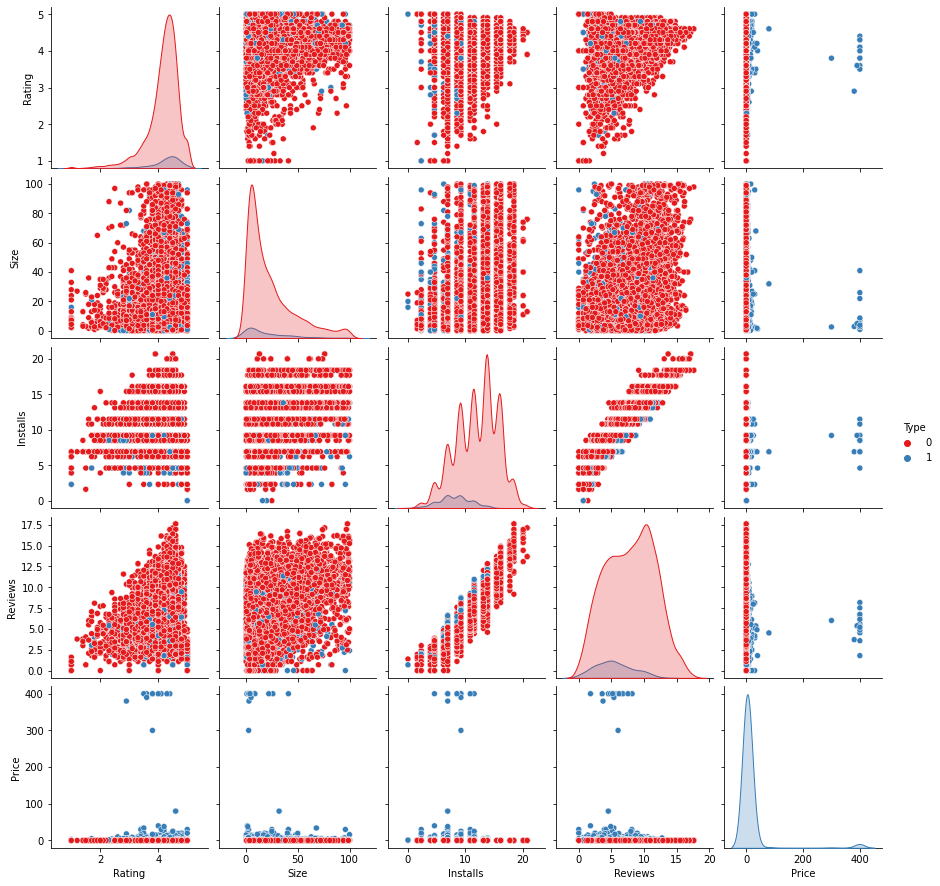

In [40]:
# On récupère les données importantes de la base de données gpsdf
rating_data = gpsdf['Rating']
size_data = gpsdf['Size']
installs_data = gpsdf['Installs']
reviews_data = gpsdf['Reviews']
type_data = gpsdf['Type']
price_data = gpsdf['Price']

# Affichage des données
plotgrap = sns.pairplot(pd.DataFrame(list(zip(rating_data, size_data, np.log(installs_data), np.log(reviews_data), type_data, price_data)), columns=['Rating', 'Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set1")

Rappel de la signification des valeurs de Type :
- 0 = Free
- 1 = Paid

On affiche désormais les données importantes de la deuxième base de données, soit gpsrevdf, en faisait la séparation entre les données concernant les revues positives et negatives.

On considère que les données principales de cette base de données sont :
- Sentiment
- Sentiment_Polarity
- Sentiment_Subjectivity

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


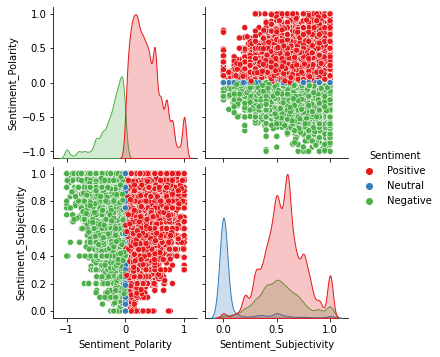

In [41]:
# On récupère les données importantes de la base de données gpsrevdf 
sentiment_data = gpsrevdf['Sentiment']
sent_pol_data = gpsrevdf['Sentiment_Polarity']
sent_sub_data = gpsrevdf['Sentiment_Subjectivity']

# Affichage des données
plotgrap = sns.pairplot(pd.DataFrame(list(zip(sentiment_data, sent_pol_data, sent_sub_data)), columns=['Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']), hue='Sentiment', palette="Set1")

## Partie 4 - Protocole expérimental

Afin de pouvoir répondre à notre problématique, nous allons suivre le protocole expérimental suivant.

#### Etape 1
Nous allons en premier mettre en place des modèles de prédiction basés le nombre de téléchargements (Installs) de chaque application de la base de données.
<br/>Pour cela, nous allons utiliser le classifieur K-moyennes que nous avons mis en place plus haut dans le notebook *(voir Partie 3 - Code)*. 
<br/>Pour chaque apprentissage, la combinaison des paramètres utilisés, soit les dimensions utilisées pour classer les exemples, seront différentes.
<br/>Afin de vérifier les résultats de chaque classifieur, nous utiliserons une validation croisée. Nous espérons obtenir des précisions de plus de 75%.

#### Etape 2
Nous effectuerons le meme travail qu'à l'étape précédente, sauf que les modèles de prédiction seront cette fois-ci basés sur la note (Rating) de chaque application de la base de données.

#### Etape 3
On effectue une première analyse des résultats obtenus dans les étapes 1 et 2, soit les précisions de la validation croisée, afin de déterminer si les résultats obtenus dans les étapes précédentes sont satisfaisants ou non. 
<br/>Dans le cas où les résultats le sont, on considère le protocole expérimental comme terminé et on passe à l'analyse des données.
<br/>Dans le cas contraire, on trouve quel modèle de prédiction est le plus prometteur en matière de résultats. Tous les modèles générés par la suite seront basés sur ce modèle.
<br/>On effectue également une sélection des exemples dans la base de données. On retire les exemples que l'on considère comme "inutiles", soit les exemples n'ayant aucune valeur d'apprentissage à nos yeux, et on vérifie le nouvel état de la base de données.

#### Etape 4
On met en place de nouveaux modèles de prédiction en utilisant la nouvelle base de données créée à l'étape 3. Les résultats rendus par ces modèles doivent normalement être supérieurs à ceux obtenus dans les étapes précédentes puisque nous avons réalisé une sélection des exemples en ne conservant que les plus intéressants.

#### Remarque sur l'expérimentation
Chaque fois que l'on doit mettre en place un nouveau modèle de prédiction, on crée dans un premier temps un modèle pilote, avec un important nombre de centroïde, dont on affichera la représentation graphique afin d'avoir une idée de la disposition des données et leur répartition au sein des clusters.

## Partie 5 - Résultats

## 1) Prédiction du nombre de téléchargements (Installs)

Dans cette première partie des résultats, nous allons chercher à montrer s'il existe une combinaison de facteurs permettant une prédiction du nombre de téléchargements d'une application.
<br/>Les facteurs allant être utilisés ici sont :
- la note attribuée à l'application (Rating)
- le nombre d'avis déposés par les utilisateurs (Reviews)
- la taille en octets d'une application (Size)

### Prédiction en fonction de Rating et Reviews

In [42]:
# Récupération des labels
label_installs_set = gpsdf['Installs'].to_numpy()

# Récupération des descriptions
desc_rating_reviews_set = ut.normalisation(gpsdf[['Rating', 'Reviews']].to_numpy()) # Rating x Reviews

# Création d'un classifieur k-means allant étudier la situation
kmeans_rating_reviews = ClassifierKmeans(30)

# Entrainement du classifieur
kmeans_rating_reviews.train(desc_rating_reviews_set, label_installs_set, epsilon=0.001)

Après avoir réalisé l'apprentissage, nous obtenons les clusters suivants :

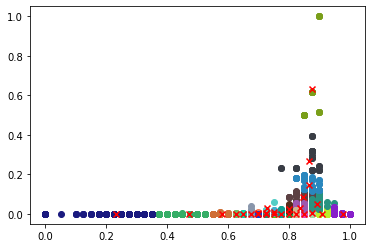

In [43]:
ut.affiche_resultat(kmeans_rating_reviews.desc_set ,kmeans_rating_reviews.liste_centroides, kmeans_rating_reviews.matrice_affectation)

(chaque couleur représente un cluster et chaque croix représente un centroide de cluster)

En utilisant 50 clusters différents, on obtient les résultats de précision suivants grâce à la validation croisée sur 10 itérations :

In [44]:
# Récupération des données (Rating X Reviews => Installs)
X = ut.normalisation(gpsdf[['Rating', 'Reviews']].to_numpy())
Y = gpsdf['Installs'].to_numpy()

niter = 10
nbCentroides = 50
perf = []
# Utilisation de la validation croisée
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval(X, Y, niter, i)
    cl = ClassifierKmeans(nbCentroides)
    cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.3134715025906736
Apprentissage  2 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.34196891191709844
Apprentissage  3 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.33419689119170987
Apprentissage  4 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.3639896373056995
Apprentissage  5 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.20984455958549222
Apprentissage  6 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.20984455958549222
Apprentissage  7 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.23056994818652848
Apprentissage  8 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.19041450777202074
Apprentissage  9 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.24740932642487046
Apprentissage  10 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.21243523316062177

Résultat global avec crossval :	moyenne= 0.265	écart-type= 0.062


### Prédiction en fonction de Rating et Size

In [45]:
# Récupération des labels
label_installs_set = gpsdf['Installs'].to_numpy()

# Récupération des descriptions
desc_rating_size_set = ut.normalisation(gpsdf[['Rating', 'Size']].to_numpy()) # Rating x Size

# Création d'un classifieur k-means allant étudier la situation
kmeans_rating_size = ClassifierKmeans(50)

# Entrainement du classifieur
kmeans_rating_size.train(desc_rating_size_set, label_installs_set, epsilon=0.001)

Après avoir réalisé l'apprentissage, nous obtenons les clusters suivants :

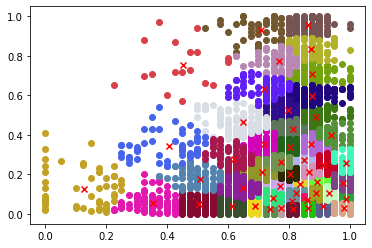

In [46]:
ut.affiche_resultat(kmeans_rating_size.desc_set ,kmeans_rating_size.liste_centroides, kmeans_rating_size.matrice_affectation)

En utilisant 50 clusters différents, on obtient les résultats de précision suivants grâce à la validation croisée sur 10 itérations :

In [47]:
# Récupération des données (Rating X Size => Installs)
X = ut.normalisation(gpsdf[['Rating', 'Size']].to_numpy())
Y = gpsdf['Installs'].to_numpy()

niter = 10
nbCentroides = 50
perf = []
# Utilisation de la validation croisée
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval(X, Y, niter, i)
    cl = ClassifierKmeans(nbCentroides)
    cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.23316062176165803
Apprentissage  2 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.22150259067357514
Apprentissage  3 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.18652849740932642
Apprentissage  4 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.18911917098445596
Apprentissage  5 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.15932642487046633
Apprentissage  6 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.18393782383419688
Apprentissage  7 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.18393782383419688
Apprentissage  8 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.18264248704663213
Apprentissage  9 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.22538860103626943
Apprentissage  10 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.19300518134715025

Résultat global avec crossval :	moyenne= 0.196	écart-type= 0.022


### Prédiction en fonction de Reviews et Size

In [48]:
# Récupération des labels
label_installs_set = gpsdf['Installs'].to_numpy()

# Récupération des descriptions
desc_reviews_size_set = ut.normalisation(gpsdf[['Reviews', 'Size']].to_numpy()) # Rating x Size

# Création d'un classifieur k-means allant étudier la situation
kmeans_reviews_size = ClassifierKmeans(50)

# Entrainement du classifieur
kmeans_reviews_size.train(desc_reviews_size_set, label_installs_set, epsilon=0.001)

Après avoir réalisé un premier apprentissage, on obtient les clusteurs suivants :

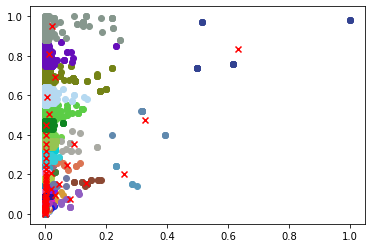

In [49]:
ut.affiche_resultat(kmeans_reviews_size.desc_set ,kmeans_reviews_size.liste_centroides, kmeans_reviews_size.matrice_affectation)

En utilisant 50 clusters différents, on obtient les résultats de précision suivants grâce à la validation croisée sur 10 itérations :

In [50]:
# Récupération des données (Reviews X Size => Installs)
X = ut.normalisation(gpsdf[['Reviews', 'Size']].to_numpy())
Y = gpsdf['Installs'].to_numpy()

niter = 10
nbCentroides = 50
perf = []
# Utilisation de la validation croisée
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval(X, Y, niter, i)
    cl = ClassifierKmeans(nbCentroides)
    cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.24611398963730569
Apprentissage  2 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.23834196891191708
Apprentissage  3 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.19818652849740934
Apprentissage  4 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.20725388601036268
Apprentissage  5 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.17357512953367876
Apprentissage  6 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.15414507772020725
Apprentissage  7 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.133419689119171
Apprentissage  8 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.12564766839378239
Apprentissage  9 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.19300518134715025
Apprentissage  10 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.15025906735751296

Résultat global avec crossval :	moyenne= 0.182	écart-type= 0.040


## 2) Prédiction de la note de l'application (Rating)

On s'intéresse désormais à la note moyenne donnée par les utilisateurs de l'application à cette dernière. Nous allons chercher s'il existe une combinaison de facteurs permettant de pouvoir prédire la note d'une application.
<br/>Les facteurs allant être étudiés dans cette partie sont :
- le nombre de téléchargements de l'application (Installs)
- le nombre d'avis déposés par les utilisateurs (Reviews)
- la taille en octets d'une application (Size)

### Prédiction en fonction de Installs et Reviews

In [51]:
# Récupération des labels
label_rating_set = gpsdf['Rating'].to_numpy()

# Récupération des descriptions
desc_installs_reviews_set = ut.normalisation(gpsdf[['Installs', 'Reviews']].to_numpy()) # Installs x Reviews

# Création d'un classifieur k-means allant étudier la situation
kmeans_installs_reviews = ClassifierKmeans(50)

# Entrainement du classifieur
kmeans_installs_reviews.train(desc_installs_reviews_set, label_rating_set, epsilon=0.001)

Après avoir réalisé un premier apprentissage, on obtient les clusters suivants :

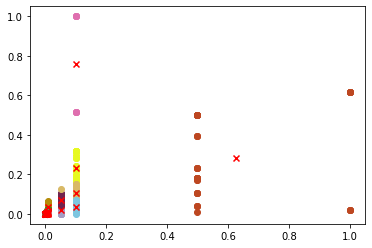

In [52]:
ut.affiche_resultat(kmeans_installs_reviews.desc_set, kmeans_installs_reviews.liste_centroides, kmeans_installs_reviews.matrice_affectation)

En utilisant 50 clusters différents, on obtient les résultats de précision suivants grâce à la validation croisée sur 10 itérations :

In [53]:
# Récupération des données (Installs X Reviews => Rating)
X = ut.normalisation(gpsdf[['Installs', 'Reviews']].to_numpy())
Y = gpsdf['Rating'].to_numpy()

niter = 10
nbCentroides = 50
perf = []
# Utilisation de la validation croisée
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval(X, Y, niter, i)
    cl = ClassifierKmeans(nbCentroides)
    cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.13212435233160622
Apprentissage  2 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.15932642487046633
Apprentissage  3 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.16968911917098445
Apprentissage  4 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.15155440414507773
Apprentissage  5 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.12564766839378239
Apprentissage  6 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.12823834196891193
Apprentissage  7 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.16709844559585493
Apprentissage  8 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.14378238341968913
Apprentissage  9 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.15414507772020725
Apprentissage  10 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.10880829015544041

Résultat global avec crossval :	moyenne= 0.144	écart-type= 0.019


### Prédiction en fonction de Installs et Size

In [54]:
# Récupération des labels
label_rating_set = gpsdf['Rating'].to_numpy()

# Récupération des descriptions
desc_installs_size_set = ut.normalisation(gpsdf[['Installs', 'Size']].to_numpy()) # Installs x Reviews

# Création d'un classifieur k-means allant étudier la situation
kmeans_installs_size = ClassifierKmeans(50)

# Entrainement du classifieur
kmeans_installs_size.train(desc_installs_size_set, label_rating_set, epsilon=0.001)

Après avoir réalisé un premier apprentissage, on obtient les clusters suivants :

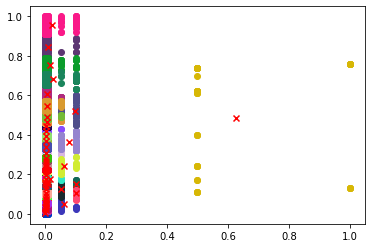

In [55]:
ut.affiche_resultat(kmeans_installs_size.desc_set, kmeans_installs_size.liste_centroides, kmeans_installs_size.matrice_affectation)

En utilisant 50 clusters différents, on obtient les résultats de précision suivants grâce à la validation croisée sur 10 itérations :

In [56]:
# Récupération des données (Installs X Size => Rating)
X = ut.normalisation(gpsdf[['Installs', 'Size']].to_numpy())
Y = gpsdf['Rating'].to_numpy()

niter = 10
nbCentroides = 50
perf = []
# Utilisation de la validation croisée
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval(X, Y, niter, i)
    cl = ClassifierKmeans(nbCentroides)
    cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.10751295336787564
Apprentissage  2 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.13989637305699482
Apprentissage  3 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.11528497409326424
Apprentissage  4 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.12953367875647667
Apprentissage  5 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.08419689119170984
Apprentissage  6 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.10362694300518134
Apprentissage  7 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.08549222797927461
Apprentissage  8 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.07901554404145078
Apprentissage  9 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.06994818652849741
Apprentissage  10 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.09974093264248704

Résultat global avec crossval :	moyenne= 0.101	écart-type= 0.021


### Prédiction en fonction de Size et Reviews

In [57]:
# Récupération des labels
label_rating_set = gpsdf['Rating'].to_numpy()

# Récupération des descriptions
desc_size_reviews_set = ut.normalisation(gpsdf[['Size', 'Reviews']].to_numpy()) # Installs x Reviews

# Création d'un classifieur k-means allant étudier la situation
kmeans_size_reviews = ClassifierKmeans(50)

# Entrainement du classifieur
kmeans_size_reviews.train(desc_size_reviews_set, label_rating_set, epsilon=0.001)

Après avoir réalisé un premier apprentissage, on obtient les clusters suivants :

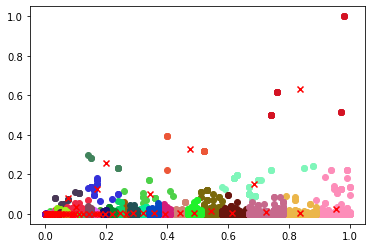

In [58]:
ut.affiche_resultat(kmeans_size_reviews.desc_set, kmeans_size_reviews.liste_centroides, kmeans_size_reviews.matrice_affectation)

En utilisant 50 clusters différents, on obtient les résultats de précision suivants grâce à la validation croisée sur 10 itérations :

In [59]:
# Récupération des données (Size x Reviews => Rating)
X = ut.normalisation(gpsdf[['Size', 'Reviews']].to_numpy())
Y = gpsdf['Rating'].to_numpy()

niter = 10
nbCentroides = 50
perf = []
# Utilisation de la validation croisée
for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = ut.crossval(X, Y, niter, i)
    cl = ClassifierKmeans(nbCentroides)
    cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.10362694300518134
Apprentissage  2 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.13212435233160622
Apprentissage  3 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.12046632124352331
Apprentissage  4 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.11787564766839378
Apprentissage  5 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.07772020725388601
Apprentissage  6 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.08937823834196891
Apprentissage  7 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.08549222797927461
Apprentissage  8 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.09326424870466321
Apprentissage  9 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.07124352331606218
Apprentissage  10 :	  |Yapp|=  6951  |Ytest|=  772 	perf=  0.08290155440414508

Résultat global avec crossval :	moyenne= 0.097	écart-type= 0.019


## 3) Analyse des premiers résultats

Après avoir réalisé une première série d'analyses, on en arrive à une première conclusion : on ne peut pas prédire la popularité d'une application en fonction de sa note (Rating) puisque ces premiers résultats montrent une précision grâce à la validation croisée d'environ 12% en moyenne, ce qui n'est pas suffisant.

Nous allons donc nous concentrer uniquement sur le nombre de téléchargements de l'application.

Il y a donc un trop grand nombre d'applications avec un faible nombre de téléchargements mais à la note élevée. Il faudrait donc réaliser une sélection dans la base de données et conserver uniquement les applications les plus populaires. On considère qu'une application n'est populaire que si elle remplit les critères suivants :
- un nombre de téléchargements supérieur ou égal à 1 million
- une note moyenne donnée par les utilisateurs de l'application supérieure ou égale à 4

On réalise alors cette sélection sur la base de données.

In [60]:
# On récupère l'indice des applications satisfaisant les conditions citées au-dessus
newgpsdf = gpsdf[gpsdf['Rating'] >= 4.] # Note supérieure ou égale à 4
newgpsdf = newgpsdf[newgpsdf['Installs'] >= 10000000] # Nombre de téléchargements supérieur ou égal à 1.000.000

Le nombre d'exemples restant dans cette base de données est de :

In [61]:
print(newgpsdf.shape[0], "exemples.")

1122 exemples.


## 4) Prédiction du nombre de téléchargements (Installs) dans la nouvelle base de données

Ayant désormais une base de données plus adaptée à nos recherches, on effectue une nouvelle fois une série de tests afin de mettre en avant s'il existe un moyen de prédire le nombre de téléchargements d'une application à travers une série de facteurs.

### Prédiction en fonction de Rating et Reviews

In [62]:
# Récupération des labels
label_installs_set = newgpsdf['Installs'].to_numpy()

# Récupération des descriptions
desc_rating_reviews_set = ut.normalisation(newgpsdf[['Rating', 'Reviews']].to_numpy()) # Rating x Reviews

# Création d'un classifieur k-means allant étudier la situation
kmeans_rating_reviews = ClassifierKmeans(30)

# Entrainement du classifieur
kmeans_rating_reviews.train(desc_rating_reviews_set, label_installs_set, epsilon=0.001)

Après avoir réalisé un premier apprentissage, on obtient les clusters suivants :

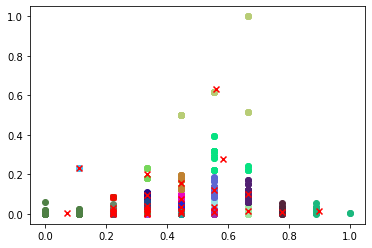

In [63]:
ut.affiche_resultat(kmeans_rating_reviews.desc_set, kmeans_rating_reviews.liste_centroides, kmeans_rating_reviews.matrice_affectation)

En utilisant **(len(np.unique(Y)) * 2)** centroides différents, on obtient les résultats de précision suivants grâce à la validation croisée sur 10 itérations :

In [64]:
# Récupération des données (Rating x Reviews => Installs)
X = ut.normalisation(newgpsdf[['Rating', 'Reviews']].to_numpy())
Y = newgpsdf['Installs'].to_numpy()

niter = 10
nbCentroides = len(np.unique(Y)) * 2
perf = []

# Utilisation de la validation croisée
for i in range(niter) :
    Xapp,Yapp,Xtest,Ytest = ut.crossval(X, Y, niter, i)
    cl = ClassifierKmeans(nbCentroides)
    cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.8303571428571429
Apprentissage  2 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.5982142857142857
Apprentissage  3 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.5982142857142857
Apprentissage  4 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.8035714285714286
Apprentissage  5 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.7946428571428571
Apprentissage  6 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.7678571428571429
Apprentissage  7 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.5178571428571429
Apprentissage  8 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.8125
Apprentissage  9 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.8125
Apprentissage  10 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.8571428571428571

Résultat global avec crossval :	moyenne= 0.739	écart-type= 0.114


### Prédiction en fonction de Rating et Size

In [65]:
# Récupération des labels
label_installs_set = newgpsdf['Installs'].to_numpy()

# Récupération des descriptions
desc_rating_size_set = ut.normalisation(newgpsdf[['Rating', 'Size']].to_numpy()) # Rating x Reviews

# Création d'un classifieur k-means allant étudier la situation
kmeans_rating_size = ClassifierKmeans(30)

# Entrainement du classifieur
kmeans_rating_size.train(desc_rating_size_set, label_installs_set, epsilon=0.001)

Après avoir réalisé un premier apprentissage, on obtient les clusters suivants :

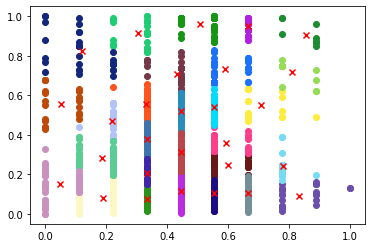

In [66]:
ut.affiche_resultat(kmeans_rating_size.desc_set, kmeans_rating_size.liste_centroides, kmeans_rating_size.matrice_affectation)

En utilisant **(len(np.unique(Y)) * 2)** centroides différents, on obtient les résultats de précision suivants grâce à la validation croisée sur 10 itérations :

In [67]:
# Récupération des données (Rating x Size => Installs)
X = ut.normalisation(newgpsdf[['Rating', 'Size']].to_numpy())
Y = newgpsdf['Installs'].to_numpy()

niter = 10
nbCentroides = len(np.unique(Y)) * 2
perf = []

# Utilisation de la validation croisée
for i in range(niter) :
    Xapp,Yapp,Xtest,Ytest = ut.crossval(X, Y, niter, i)
    cl = ClassifierKmeans(nbCentroides)
    cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.7857142857142857
Apprentissage  2 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.42857142857142855
Apprentissage  3 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.44642857142857145
Apprentissage  4 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.7589285714285714
Apprentissage  5 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.7767857142857143
Apprentissage  6 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.6696428571428571
Apprentissage  7 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.36607142857142855
Apprentissage  8 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.6964285714285714
Apprentissage  9 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.7857142857142857
Apprentissage  10 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.8214285714285714

Résultat global avec crossval :	moyenne= 0.654	écart-type= 0.164


### Prédiction en fonction de Reviews et Size

In [68]:
# Récupération des labels
label_installs_set = newgpsdf['Installs'].to_numpy()

# Récupération des descriptions
desc_reviews_size_set = ut.normalisation(newgpsdf[['Reviews', 'Size']].to_numpy()) # Rating x Reviews

# Création d'un classifieur k-means allant étudier la situation
kmeans_reviews_size = ClassifierKmeans(30)

# Entrainement du classifieur
kmeans_reviews_size.train(desc_reviews_size_set, label_installs_set, epsilon=0.001)

Après avoir réalisé un premier apprentissage, on obtient les clusters suivants :

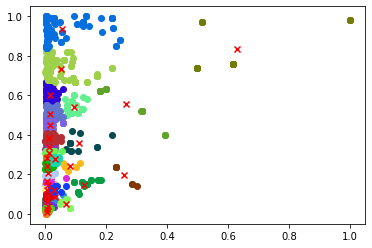

In [69]:
ut.affiche_resultat(kmeans_reviews_size.desc_set, kmeans_reviews_size.liste_centroides, kmeans_reviews_size.matrice_affectation)

En utilisant **(len(np.unique(Y)) * 4)** centroides différents, on obtient les résultats de précision suivants grâce à la validation croisée sur 10 itérations :

In [85]:
# Récupération des données (Reviews x Size => Installs)
X = ut.normalisation(newgpsdf[['Reviews', 'Size']].to_numpy())
Y = newgpsdf['Installs'].to_numpy()

niter = 10
nbCentroides = len(np.unique(Y)) * 10
perf = []

# Utilisation de la validation croisée
for i in range(niter) :
    Xapp,Yapp,Xtest,Ytest = ut.crossval(X, Y, niter, i)
    cl = ClassifierKmeans(nbCentroides)
    cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.8303571428571429
Apprentissage  2 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.6071428571428571
Apprentissage  3 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.7589285714285714
Apprentissage  4 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.7946428571428571
Apprentissage  5 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.8482142857142857
Apprentissage  6 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.7321428571428571
Apprentissage  7 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.5446428571428571
Apprentissage  8 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.8482142857142857
Apprentissage  9 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.8125
Apprentissage  10 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.8214285714285714

Résultat global avec crossval :	moyenne= 0.760	écart-type= 0.099


### Prédiction en fonction de Rating, Size et Reviews

On essaye maintenant d'utiliser les 3 facteurs précédents en meme temps.

En utilisant **(len(np.unique(Y)) * 4)** centroides différents, on obtient les résultats de précision suivants grâce à la validation croisée sur 10 itérations :

In [84]:
# Récupération des données (Reviews x Rating x Size => Installs)
X = ut.normalisation(newgpsdf[['Reviews', 'Rating', 'Size']].to_numpy())
Y = newgpsdf['Installs'].to_numpy()

niter = 10
nbCentroides = len(np.unique(Y)) * 2
perf = []

# Utilisation de la validation croisée
for i in range(niter) :
    Xapp,Yapp,Xtest,Ytest = ut.crossval(X, Y, niter, i)
    cl = ClassifierKmeans(nbCentroides)
    cl.train(Xapp, Yapp)
    perf.append(cl.accuracy(Xtest, Ytest))
    print("Apprentissage ",i+1,":\t"," |Yapp|= ",len(Yapp)," |Ytest|= ",len(Ytest),"\tperf= ",perf[-1])

# On transforme la liste en array numpy pour avoir les fonctions statistiques:
perf = np.array(perf)
print(f'\nRésultat global avec crossval :\tmoyenne= {perf.mean():.3f}\técart-type= {perf.std():.3f}')

Apprentissage  1 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.7857142857142857
Apprentissage  2 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.49107142857142855
Apprentissage  3 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.49107142857142855
Apprentissage  4 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.6875
Apprentissage  5 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.7767857142857143
Apprentissage  6 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.6696428571428571
Apprentissage  7 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.4375
Apprentissage  8 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.6785714285714286
Apprentissage  9 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.7232142857142857
Apprentissage  10 :	  |Yapp|=  1010  |Ytest|=  112 	perf=  0.6785714285714286

Résultat global avec crossval :	moyenne= 0.642	écart-type= 0.118


## Partie 6 - Analyse